## **Segmentación y conocimiento de los clientes de un SuperMercado**

Proyecto elaborado por: **Lizeth Katherine Bustos Espinosa**

Curso: Análisis de Datos nivel Integrador

Fecha desarrollo proyecto: 24/05/2024

Versión del proyecto: 1

Url repositorio GitHub: https://github.com/LizethBustos/TalentTech

Url Video: https://youtu.be/JfFWqr9IBdo

**Dataset tomado de:**

https://www.kaggle.com/datasets/shashankshukla123123/marketing-campaign/data

**Definición de variables:**

**ID:**	          Identificador único para cada cliente

**Año_nacimiento:**	Año de nacimiento del cliente.

**Educación:**  Nivel educativo del cliente.

**Estado_civil:**	Estado civil del cliente

**Ingresos:**	Ingresos anuales del cliente.

**Numero_niños:**	Número de niños pequeños en el hogar

**Numero_adolescentes:**	Número de adolescentes en el hogar.

**Fecha_inscripcion:**	Fecha en la que el cliente se inscribió

**Dias_ult_compra:**	Número de días desde la última compra

**Cant_vino:**	Cantidad ventas vinos en los últimos 2 años

**Cant_fruta:**	Cantidad ventas frutas en los últimos 2 años

**Cant_carne:**	Cantidad ventas productos cárnicos en los últimos 2 años

**Cant_pescado:**	Cantidad ventas productos pesqueros en los últimos 2 años

**Cant_dulces:**	Cantidad ventas productos dulces en los últimos 2 años

**Cant_oro:**	Cantidad ventas productos de oro en los últimos 2 años

**Compras_descuento:**	Número de ventas realizadas con descuento

**Compras_web:**	Número de ventas realizadas a través de la web

**Compras_catalogo:**	Número de ventas realizadas mediante catálogo

**Compras_tienda:**	Número de ventas realizadas directamente en tiendas

**Visitas_pagWeb:**	Número de visitas al sitio web por mes

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from datetime import datetime

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_score

**Carga de datos**

In [45]:
df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')
#df.head()

**Exploración de los datos**

In [46]:
#Visualización de toda la tabla
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#df

In [47]:
#devuelve el numero de filas y columnas
#print(df.shape)

In [48]:
#Se eliminan las columnas que no se utilizarán
new_df = df.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)

#Se cambian los nombres de las columnas para mayor comprensión
new_df = new_df.rename(columns={'Year_Birth':'Anio_nacimiento','Education':'Educacion','Marital_Status':'Estado_civil','Income':'Ingresos','Kidhome':'Numero_ninos',
                                'Teenhome':'Numero_adolescentes','Dt_Customer':'Fecha_inscripcion','Recency':'Dias_ult_compra','MntWines':'Cant_vino','MntFruits':'Cant_fruta',
                                'MntMeatProducts':'Cant_carne','MntFishProducts':'Cant_pescado','MntSweetProducts':'Cant_dulces','MntGoldProds':'Cant_oro','NumDealsPurchases':'Compras_descuento',
                                'NumWebPurchases':'Compras_web','NumCatalogPurchases':'Compras_catalogo','NumStorePurchases':'Compras_tienda','NumWebVisitsMonth':'Visitas_pagWeb'})

new_df.head()

,ID,Anio_nacimiento,Educacion,Estado_civil,Ingresos,Numero_ninos,Numero_adolescentes,Fecha_inscripcion,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5


In [49]:
#información para hacer limpieza y exploración
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Anio_nacimiento      2240 non-null   int64  
 2   Educacion            2240 non-null   object 
 3   Estado_civil         2240 non-null   object 
 4   Ingresos             2216 non-null   float64
 5   Numero_ninos         2240 non-null   int64  
 6   Numero_adolescentes  2240 non-null   int64  
 7   Fecha_inscripcion    2240 non-null   object 
 8   Dias_ult_compra      2240 non-null   int64  
 9   Cant_vino            2240 non-null   int64  
 10  Cant_fruta           2240 non-null   int64  
 11  Cant_carne           2240 non-null   int64  
 12  Cant_pescado         2240 non-null   int64  
 13  Cant_dulces          2240 non-null   int64  
 14  Cant_oro             2240 non-null   int64  
 15  Compras_descuento    2240 non-null   i

En el conjunto de datos se observan 19 variables, sin contar el ID. De estas, 1 es de tipo flotante, 16 son de tipo entero y 3 son categóricas. Se detectaron 24 valores nulos en la variable de ingresos. La columna Fecha_inscripcion tiene el tipo de dato objeto, lo que podría generar errores en el análisis. Además, la columna Anio_nacimiento proporciona el año de nacimiento del cliente, por lo que es necesario transformarla para calcular la edad, ya que esta sería una variable más útil para el análisis.

**Tratamiento de los datos**

In [50]:
#Pasamos la Columna que guarda la fecha de inscripcion del cliente de dato Object a tipo de dato Fecha
new_df.Fecha_inscripcion = pd.to_datetime(new_df.Fecha_inscripcion, format = '%d-%m-%Y')
new_df['Edad'] = datetime.now().year - new_df['Anio_nacimiento']
#new_df.info()

In [51]:
#Indicamos las estadísticas de las variables numéricas y eliminamos temporalmente la columna ID
new_df.drop('ID', axis=1).describe()

,Anio_nacimiento,Ingresos,Numero_ninos,Numero_adolescentes,Fecha_inscripcion,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb,Edad
count,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,55.194196
min,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000
50%,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000
75%,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000
max,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000
std,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,11.984069


Este análisis muestra que la mayoría de los clientes tienen un ingreso promedio moderado, no tienen niños ni adolescentes, y han sido clientes desde hace aproximadamente una década. Sus patrones de compra indican una preferencia por el vino y la carne, con menos compras de pescado, frutas y dulces. También realizan compras tanto en línea como en tiendas físicas, con una frecuencia de visitas web moderada.

In [52]:
new_df.describe(include=['object'])

,Educacion,Estado_civil
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


Las variables categóricas Educacion y Estado_civil del conjunto de datos muestran que de los 2240 registros, Educacion presenta 5 categorías únicas, siendo "Graduation" (Graduación) la más frecuente con 1127 casos, lo que indica que aproximadamente el 50.3% de los clientes tienen al menos un título de graduación. Estado_civil tiene 8 categorías únicas, con "Married" (Casado) como la más común, representando 864 casos, lo que sugiere que una proporción significativa de los clientes está casada. Este perfil demográfico revela que los clientes suelen tener un alto nivel educativo y una mayoría está casada, factores que podrían influir en sus patrones de compra y necesidades. Analizar cómo estas variables se relacionan con otras características del cliente, como ingresos y preferencias de productos, puede proporcionar información valiosa para segmentar el mercado y personalizar estrategias de marketing.

In [53]:
valores_faltantes = new_df.isnull().sum()
print(valores_faltantes)

ID                      0
Anio_nacimiento         0
Educacion               0
Estado_civil            0
Ingresos               24
Numero_ninos            0
Numero_adolescentes     0
Fecha_inscripcion       0
Dias_ult_compra         0
Cant_vino               0
Cant_fruta              0
Cant_carne              0
Cant_pescado            0
Cant_dulces             0
Cant_oro                0
Compras_descuento       0
Compras_web             0
Compras_catalogo        0
Compras_tienda          0
Visitas_pagWeb          0
Edad                    0
dtype: int64


In [54]:
porcentaje_faltantes = (valores_faltantes/len(new_df)*100)
print(porcentaje_faltantes)

ID                     0.000000
Anio_nacimiento        0.000000
Educacion              0.000000
Estado_civil           0.000000
Ingresos               1.071429
Numero_ninos           0.000000
Numero_adolescentes    0.000000
Fecha_inscripcion      0.000000
Dias_ult_compra        0.000000
Cant_vino              0.000000
Cant_fruta             0.000000
Cant_carne             0.000000
Cant_pescado           0.000000
Cant_dulces            0.000000
Cant_oro               0.000000
Compras_descuento      0.000000
Compras_web            0.000000
Compras_catalogo       0.000000
Compras_tienda         0.000000
Visitas_pagWeb         0.000000
Edad                   0.000000
dtype: float64


In [55]:
#imputamos los null con la media
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
new_df[['Ingresos']] = imp.fit_transform(new_df[['Ingresos']])

#validamos
new_df.isnull().sum()

ID                     0
Anio_nacimiento        0
Educacion              0
Estado_civil           0
Ingresos               0
Numero_ninos           0
Numero_adolescentes    0
Fecha_inscripcion      0
Dias_ult_compra        0
Cant_vino              0
Cant_fruta             0
Cant_carne             0
Cant_pescado           0
Cant_dulces            0
Cant_oro               0
Compras_descuento      0
Compras_web            0
Compras_catalogo       0
Compras_tienda         0
Visitas_pagWeb         0
Edad                   0
dtype: int64

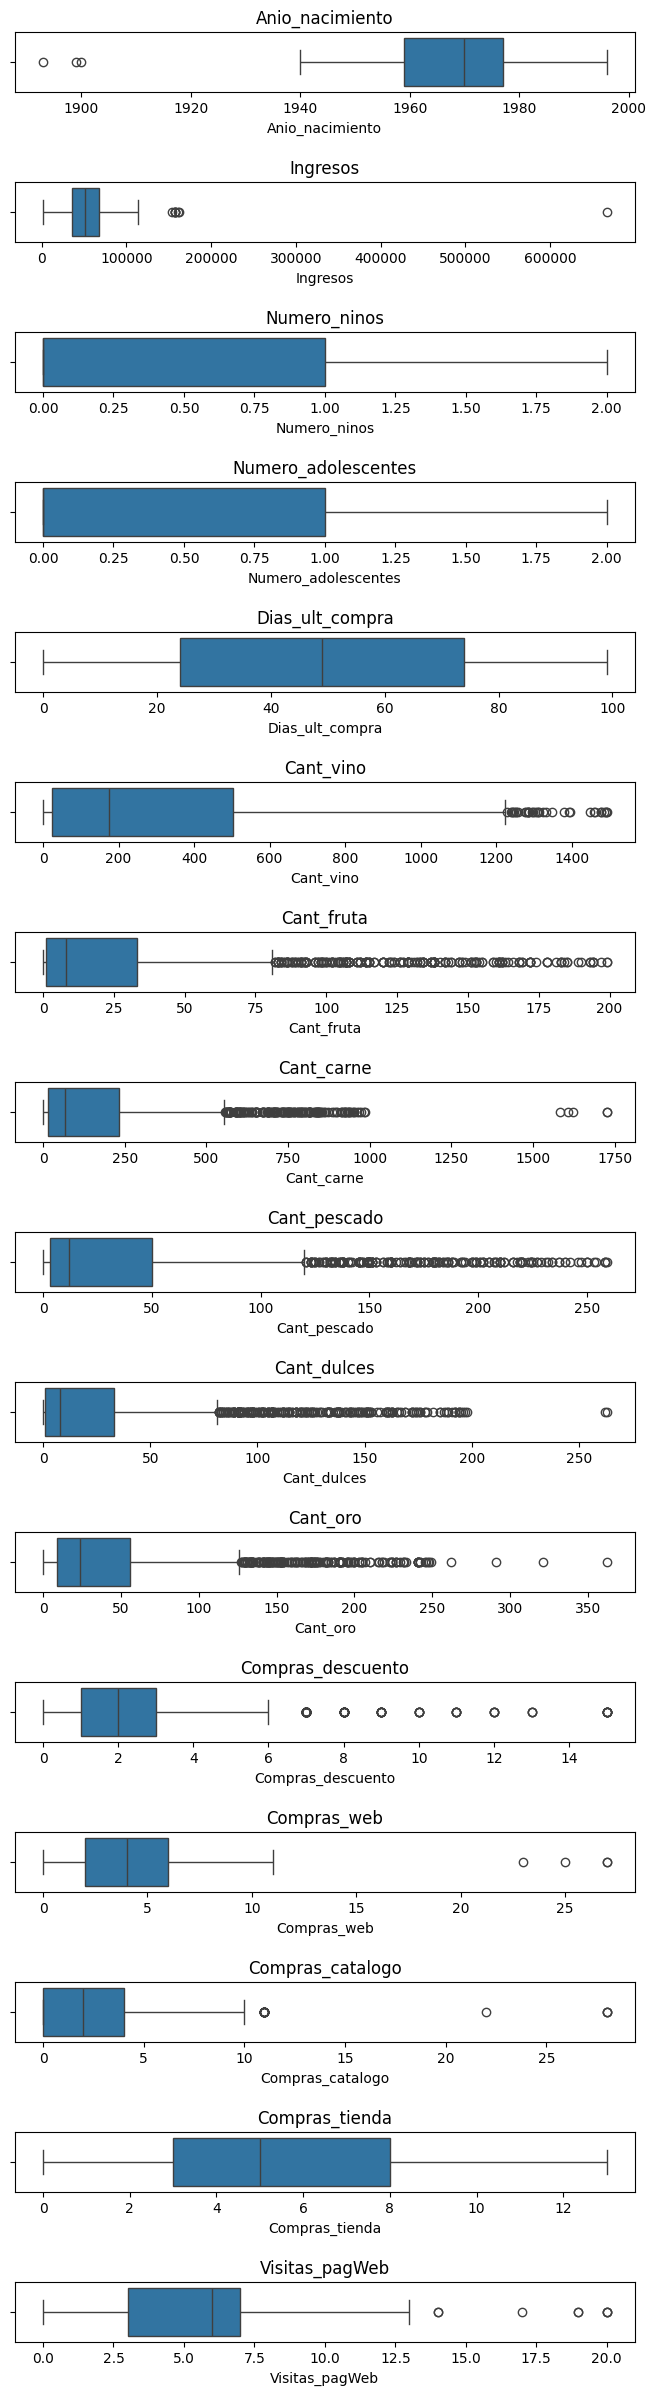

In [56]:
columnas_numericas = ['Anio_nacimiento', 'Ingresos', 'Numero_ninos', 'Numero_adolescentes', 'Dias_ult_compra', 'Cant_vino', 'Cant_fruta', 'Cant_carne', 'Cant_pescado',
            'Cant_dulces', 'Cant_oro', 'Compras_descuento', 'Compras_web', 'Compras_catalogo', 'Compras_tienda', 'Visitas_pagWeb']

fig, ax = plt.subplots(nrows=16, ncols=1, figsize=(8,30))

fig.subplots_adjust(hspace=1.5)

for i, column in enumerate(columnas_numericas):
  sns.boxplot(x=column, data=new_df, ax=ax[i])
  ax[i].set_title(column)

In [57]:
#calculamos la media y la desviación estandar de los valores numericos para identificar valores atípicos y reemplazarlos a null
df_numeric = new_df.select_dtypes(include=[np.number])

#identificamos el z_scores
z_scores = (df_numeric - df_numeric.mean()) / df_numeric.std()

#definicion del umbral para los valoresa atipicos
umbral=3

#identificamos los valores atípicos
outliers = (z_scores.abs()>umbral)

# Crear una máscara que marca las filas con valores atípicos
filas_con_atipicos = outliers.any(axis=1)

# Filtrar las filas que no tienen valores atípicos
df_sin_atipicos = new_df[~filas_con_atipicos]

# Mostrar el DataFrame resultante sin los registros con valores atípicos
df_sin_atipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1978 non-null   int64         
 1   Anio_nacimiento      1978 non-null   int64         
 2   Educacion            1978 non-null   object        
 3   Estado_civil         1978 non-null   object        
 4   Ingresos             1978 non-null   float64       
 5   Numero_ninos         1978 non-null   int64         
 6   Numero_adolescentes  1978 non-null   int64         
 7   Fecha_inscripcion    1978 non-null   datetime64[ns]
 8   Dias_ult_compra      1978 non-null   int64         
 9   Cant_vino            1978 non-null   int64         
 10  Cant_fruta           1978 non-null   int64         
 11  Cant_carne           1978 non-null   int64         
 12  Cant_pescado         1978 non-null   int64         
 13  Cant_dulces          1978 non-null   i

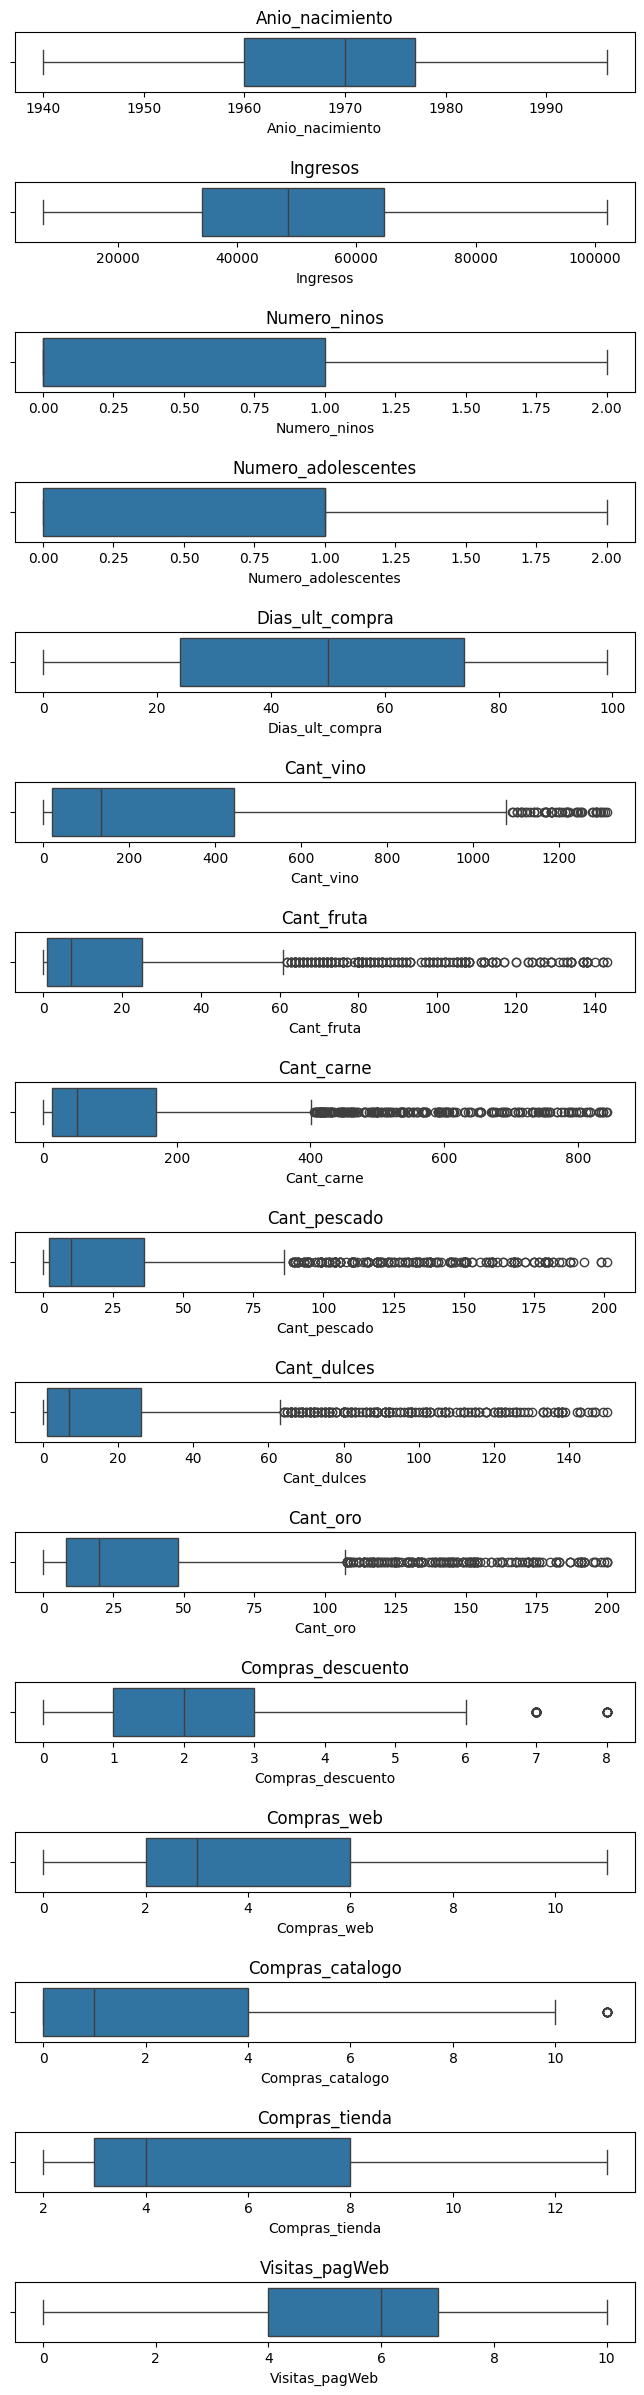

In [58]:
columnas_numericas = ['Anio_nacimiento', 'Ingresos', 'Numero_ninos', 'Numero_adolescentes', 'Dias_ult_compra', 'Cant_vino', 'Cant_fruta', 'Cant_carne', 'Cant_pescado',
            'Cant_dulces', 'Cant_oro', 'Compras_descuento', 'Compras_web', 'Compras_catalogo', 'Compras_tienda', 'Visitas_pagWeb']

fig, ax = plt.subplots(nrows=16, ncols=1, figsize=(8,30))

fig.subplots_adjust(hspace=1.5)

for i, column in enumerate(columnas_numericas):
  sns.boxplot(x=column, data=df_sin_atipicos, ax=ax[i])
  ax[i].set_title(column)

In [59]:
print(f'Tamaño del set antes de eliminar las filas repetidas: {df_sin_atipicos.shape}')

df_sin_atipicos = new_df[~filas_con_atipicos].copy()
#drop_duplicates, elimina las filas duplicadas
df_sin_atipicos.drop_duplicates(inplace = True)

print(f'Tamaño del set despues de eliminar las filas repetidas: {df_sin_atipicos.shape}')

Tamaño del set antes de eliminar las filas repetidas: (1978, 21)
Tamaño del set despues de eliminar las filas repetidas: (1978, 21)


In [60]:
df_sin_atipicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1978 entries, 0 to 2239
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1978 non-null   int64         
 1   Anio_nacimiento      1978 non-null   int64         
 2   Educacion            1978 non-null   object        
 3   Estado_civil         1978 non-null   object        
 4   Ingresos             1978 non-null   float64       
 5   Numero_ninos         1978 non-null   int64         
 6   Numero_adolescentes  1978 non-null   int64         
 7   Fecha_inscripcion    1978 non-null   datetime64[ns]
 8   Dias_ult_compra      1978 non-null   int64         
 9   Cant_vino            1978 non-null   int64         
 10  Cant_fruta           1978 non-null   int64         
 11  Cant_carne           1978 non-null   int64         
 12  Cant_pescado         1978 non-null   int64         
 13  Cant_dulces          1978 non-null   i

Después del tratamiento de datos, el conjunto de datos ahora incluye 20 variables, debido a la incorporación de la variable Edad. De estas, 1 es de tipo fecha, 1 es de tipo flotante, 17 son de tipo entero y 2 son variables categóricas. Tras la limpieza y transformación de los datos, se trabajará con un total de 1978 registros.

**Análisis exploratorio**

In [61]:
#Identificamos las variables categóricas
for i in df_sin_atipicos.columns[df_sin_atipicos.dtypes == 'object']:
  print(f'Total categories in the feature {i}:\n  \n',df_sin_atipicos[i].value_counts())

Total categories in the feature Educacion:
  
 Educacion
Graduation    971
PhD           444
Master        337
2n Cycle      173
Basic          53
Name: count, dtype: int64
Total categories in the feature Estado_civil:
  
 Estado_civil
Married     766
Together    520
Single      416
Divorced    207
Widow        63
Alone         3
YOLO          2
Absurd        1
Name: count, dtype: int64


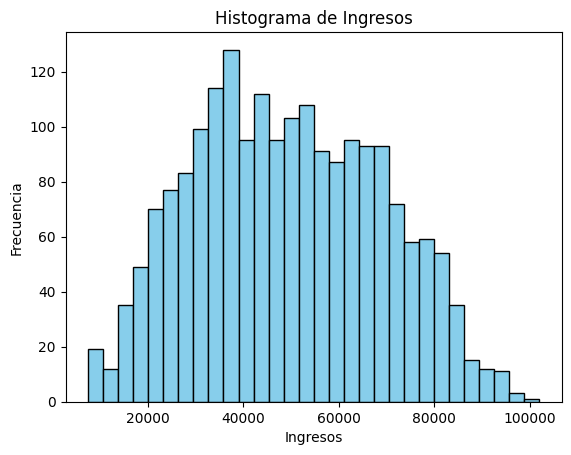

In [62]:
ingresos = df_sin_atipicos['Ingresos']

# Crear el histograma
plt.hist(ingresos, bins=30, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Ingresos')

# Mostrar el histograma
plt.show()

Se identifica una distribución normal en forma de campana en el histograma, lo que indica una distribución simétrica de los datos. La mayoría de los clientes presentan ingresos concentrados en el rango de 30,000 a 40,000 unidades monetarias.

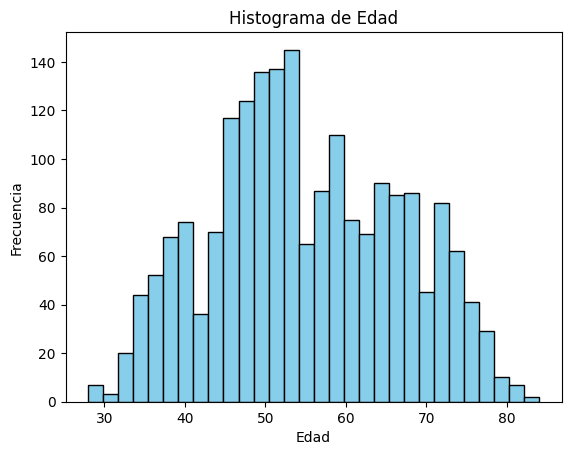

In [63]:
edad = df_sin_atipicos['Edad']
plt.hist(edad,bins=30,color='skyblue',edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

Se observa que una proporción significativa de los clientes se encuentra en el grupo de edad entre los 50 y 55 años, lo que sugiere que esta franja de edad representa una parte considerable de la base de clientes

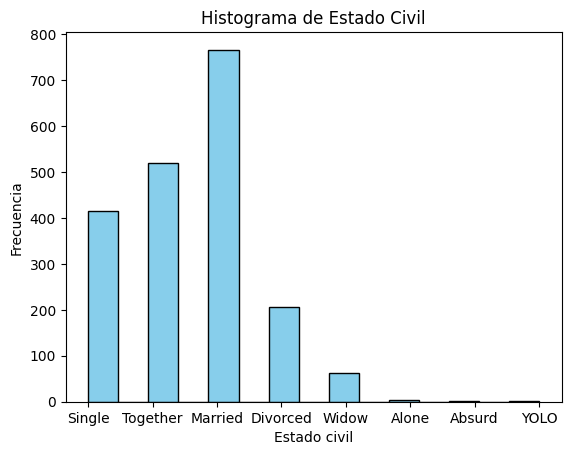

In [64]:
estado_civil = df_sin_atipicos['Estado_civil']
plt.hist(estado_civil,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Estado civil')
plt.ylabel('Frecuencia')
plt.title('Histograma de Estado Civil')
plt.show()

El grupo de clientes más representativo en el conjunto de datos está conformado por personas casadas o en pareja.

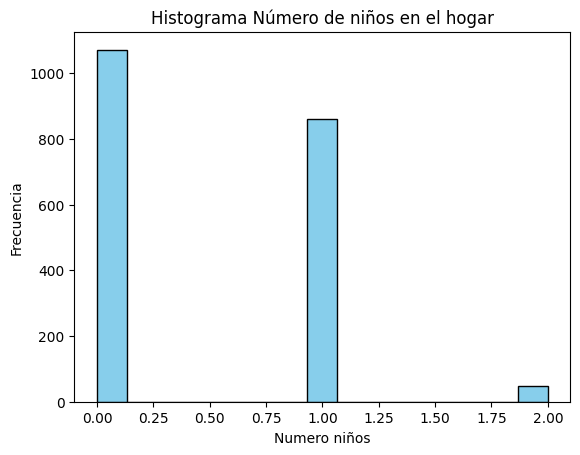

In [65]:
numero_ninos = df_sin_atipicos['Numero_ninos']
plt.hist(numero_ninos,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Numero niños')
plt.ylabel('Frecuencia')
plt.title('Histograma Número de niños en el hogar')
plt.show()

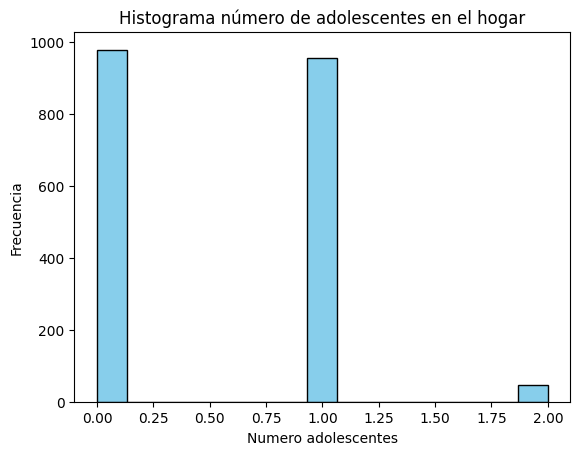

In [66]:
numero_adolescentes = df_sin_atipicos['Numero_adolescentes']
plt.hist(numero_adolescentes,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Numero adolescentes')
plt.ylabel('Frecuencia')
plt.title('Histograma número de adolescentes en el hogar')
plt.show()

Se nota que una cantidad considerable de usuarios no tienen hijos o ya no viven con ellos, y aquellos que sí los tienen están en la etapa de adolescencia. Este hallazgo cobra sentido considerando que la mayoría de los clientes se encuentran en el rango de edad entre 50 y 55 años.

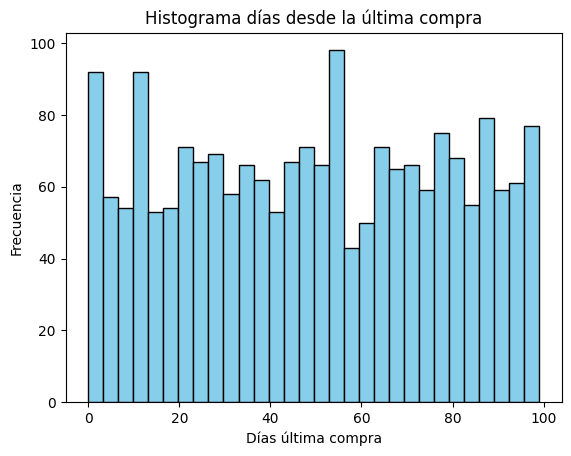

In [67]:
dias_ult_compra = df_sin_atipicos['Dias_ult_compra']
plt.hist(dias_ult_compra,bins=30,color='skyblue',edgecolor='black')
plt.xlabel('Días última compra')
plt.ylabel('Frecuencia')
plt.title('Histograma días desde la última compra')
plt.show()

La mayoría de los clientes indicaron que su última compra en el supermercado ocurrió hace 55 días. Por ende, es evidente la necesidad de mejorar las estrategias de marketing para incentivar compras más frecuentes. Esto podría lograrse ofreciendo productos y servicios que se ajusten a los segmentos específicos del mercado y respondan a las necesidades y preferencias de los clientes.

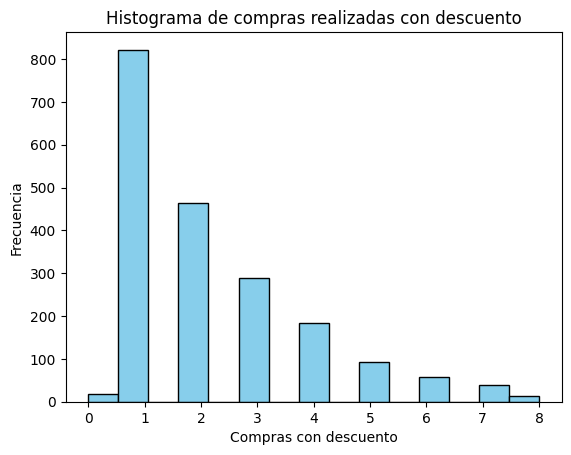

In [68]:
compras_descuento = df_sin_atipicos['Compras_descuento']
plt.hist(compras_descuento,bins=15,color='skyblue',edgecolor='black')
plt.xlabel('Compras con descuento')
plt.ylabel('Frecuencia')
plt.title('Histograma de compras realizadas con descuento')
plt.show()

Las estrategias de ofrecer descuentos no parecen ser efectivas, ya que la mayoría de los clientes solo los han utilizado una vez. Se sugiere realizar una investigación para determinar si los descuentos no son atractivos para este segmento de clientes o si la publicidad necesaria para dar a conocer las ofertas de descuento no se está llevando a cabo adecuadamente.

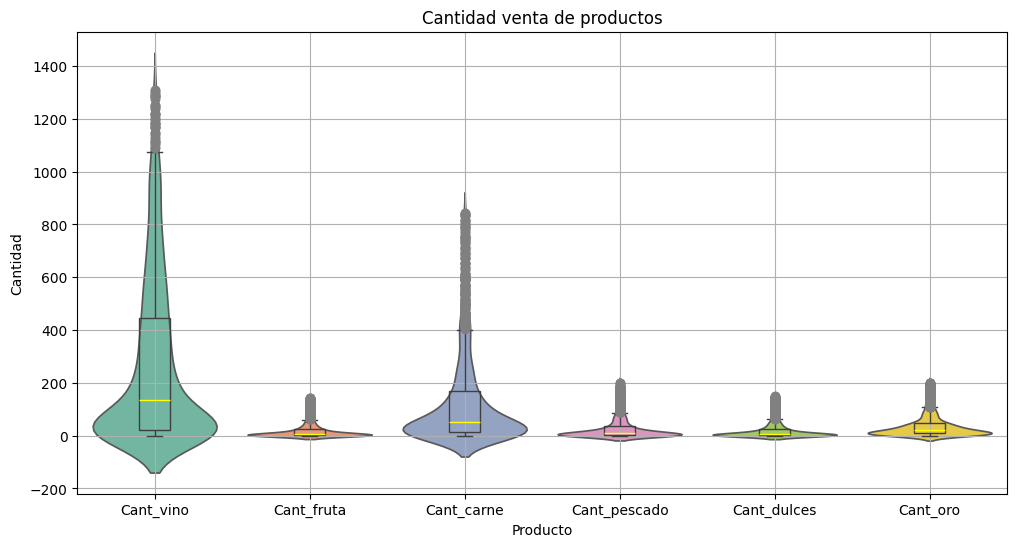

In [69]:
# Seleccionar las columnas de interés
var_selec = df_sin_atipicos[['Cant_vino', 'Cant_fruta', 'Cant_carne', 'Cant_pescado', 'Cant_dulces', 'Cant_oro']]

# Convertir el DataFrame al formato largo
df_long = pd.melt(var_selec, var_name='Producto', value_name='Cantidad')

# Establecer una paleta de colores atractiva con exactamente 6 colores
palette = sns.color_palette("Set2", n_colors=6)

# Crear el diagrama de violín con boxplot
plt.figure(figsize=(12, 6))

# Crear el gráfico de violín sin elementos internos
sns.violinplot(x='Producto', y='Cantidad', hue='Producto', data=df_long, palette=palette, inner=None, dodge=False, legend=False)

# Superponer el boxplot
sns.boxplot(x='Producto', y='Cantidad', data=df_long, whis=1.5, width=0.2, showcaps=True,
            boxprops={'zorder': 2, 'facecolor': 'none'}, showfliers=True, whiskerprops={'zorder': 2},
            flierprops={'zorder': 2, 'markerfacecolor': 'gray', 'markeredgecolor': 'gray'},
            medianprops={'color': 'yellow', 'zorder': 3})

# Añadir título y etiquetas
plt.title('Cantidad venta de productos')
plt.xlabel('Producto')
plt.ylabel('Cantidad')
plt.grid(True)

# Mostrar la gráfica
plt.show()

En el diagrama de violín, se puede inferir que la mayor concentración de datos se encuentra en las ventas de vinos y carnes. La línea amarilla representa el valor central de los datos. Para las ventas de vinos, este valor se sitúa cerca de 150, mientras que para las ventas de carnes se encuentra alrededor de 50. Esta Información es útil para la gestión de inventarios.

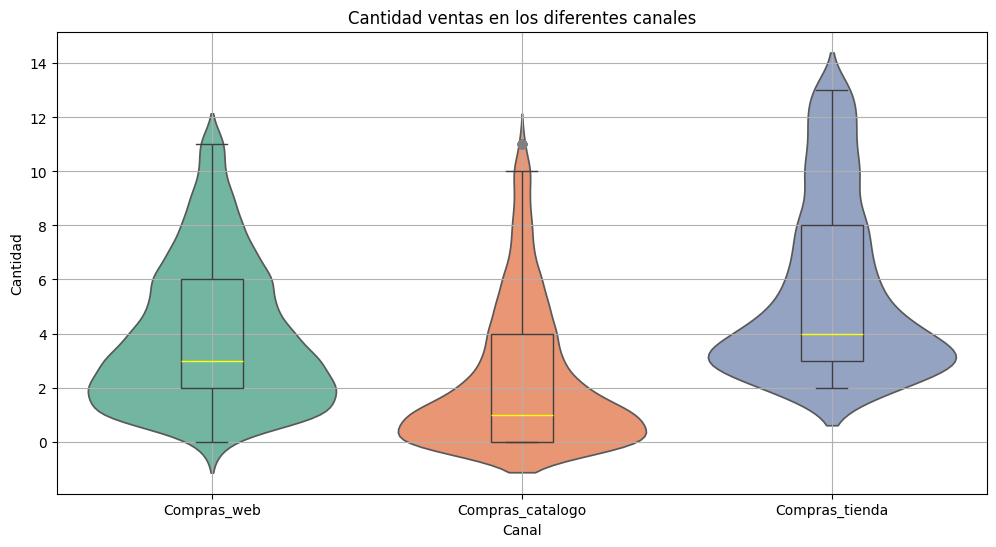

In [70]:
# Seleccionar las columnas de interés
var_selec = df_sin_atipicos[['Compras_web', 'Compras_catalogo', 'Compras_tienda']]

# Convertir el DataFrame al formato largo
df_long = pd.melt(var_selec, var_name='Canal', value_name='Cantidad')

# Establecer una paleta de colores atractiva con exactamente 3 colores
palette = sns.color_palette("Set2", n_colors=3)

# Crear el diagrama de violín con boxplot
plt.figure(figsize=(12, 6))

# Crear el gráfico de violín sin elementos internos
sns.violinplot(x='Canal', y='Cantidad', hue='Canal', data=df_long, palette=palette, inner=None, dodge=False, legend=False)

# Superponer el boxplot
sns.boxplot(x='Canal', y='Cantidad', data=df_long, whis=1.5, width=0.2, showcaps=True,
            boxprops={'zorder': 2, 'facecolor': 'none'}, showfliers=True, whiskerprops={'zorder': 2},
            flierprops={'zorder': 2, 'markerfacecolor': 'gray', 'markeredgecolor': 'gray'},
            medianprops={'color': 'yellow', 'zorder': 3})

# Añadir título y etiquetas
plt.title('Cantidad ventas en los diferentes canales')
plt.xlabel('Canal')
plt.ylabel('Cantidad')
plt.grid(True)

# Mostrar la gráfica
plt.show()

En el diagrama de violín, se evidencia que la mayor concentración de datos se encuentra en los canales de ventas web y tienda física. La línea amarilla, que representa el valor central de los datos, se sitúa en 3 para el canal web y en 4 para las ventas en tienda física. Aunque las ventas a través del canal web muestran una menor frecuencia de uso, parece haber una mayor cantidad de transacciones en comparación con las ventas en tienda física. Esto sugiere una mayor preferencia por el canal de compra en línea, el cual alcanza a un mayor número de personas.

## **Análisis de grupos o agrupamiento**

**Label Encoding**

In [71]:
#from sklearn.preprocessing import LabelEncoder

#Copia df original
df_estandarizado = df_sin_atipicos.copy()

#Inicializar el LabelEncoder
le = LabelEncoder()

#Aplicamos Label Encoding a ambas columnas
df_estandarizado['Educacion']=le.fit_transform(df_estandarizado['Educacion'])
df_estandarizado['Estado_civil']=le.fit_transform(df_estandarizado['Estado_civil'])

df_estandarizado.head()

,ID,Anio_nacimiento,Educacion,Estado_civil,Ingresos,Numero_ninos,Numero_adolescentes,Fecha_inscripcion,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb,Edad
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,67
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,70
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,59
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,40
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,43


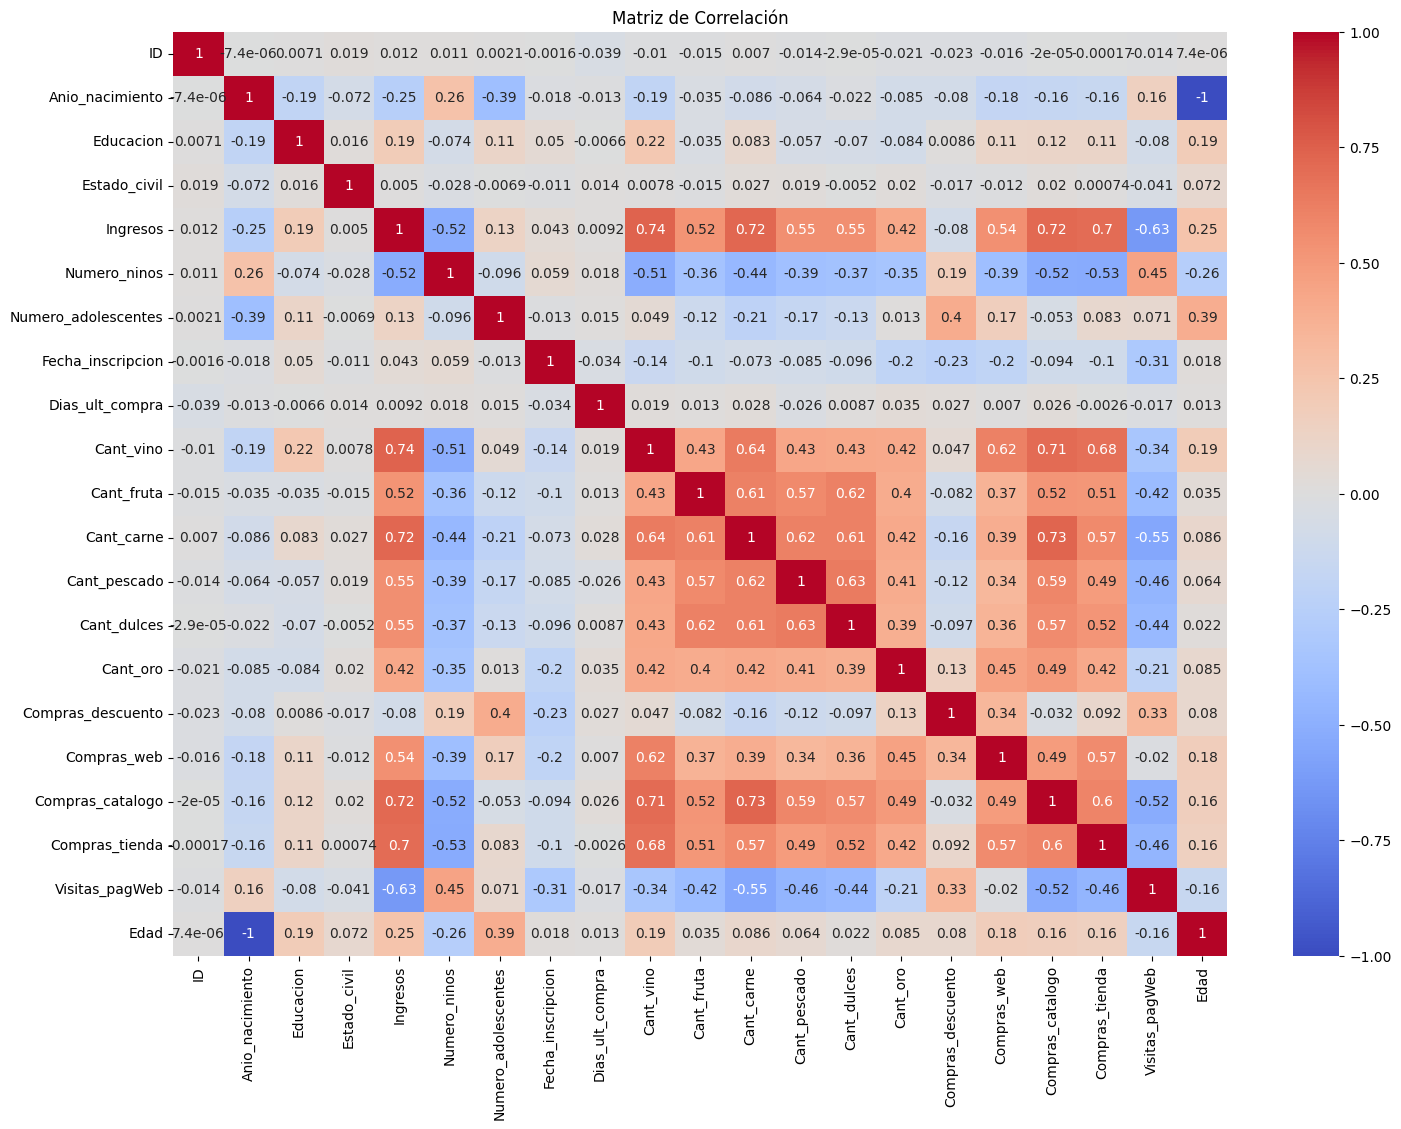

In [72]:
#Calculo matriz de correlación
correlation_matrix = df_estandarizado.corr()

#Visualización matriz de correlación
plt.figure(figsize=(17,12)) #ancho,alto
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

In [73]:
# Excluimos la columna fechas
df_col_numeric = df_estandarizado.select_dtypes(include=['float64', 'int64'])

#Scaling and Standardizing
X = StandardScaler().fit_transform(df_col_numeric)

In [74]:
from sklearn.preprocessing import PowerTransformer
X = PowerTransformer(standardize=False).fit_transform(X)

In [75]:
X = pd.DataFrame(X, columns=df_col_numeric.columns)
# sanity check
X.head()

,ID,Anio_nacimiento,Educacion,Estado_civil,Ingresos,Numero_ninos,Numero_adolescentes,Dias_ult_compra,Cant_vino,Cant_fruta,Cant_carne,Cant_pescado,Cant_dulces,Cant_oro,Compras_descuento,Compras_web,Compras_catalogo,Compras_tienda,Visitas_pagWeb,Edad
0,-0.022005,-0.990417,-0.363508,0.250082,0.445624,-1.099827,-1.086030,0.300526,0.685197,0.710973,0.759824,0.802675,0.701410,0.646049,0.366691,1.129468,1.250552,-0.603674,0.767525,0.990417
1,-1.069748,-1.229816,-0.363508,0.250082,-0.151297,0.764010,0.785733,-0.389367,-1.271826,-1.104724,-1.222497,-1.102270,-1.103343,-1.160541,-0.202758,-1.465967,-0.653807,-1.660951,-0.216418,1.229816
2,-0.451476,-0.335589,-0.363508,1.106507,1.097381,-1.099827,-1.086030,-0.801853,0.372474,0.502603,-0.029151,0.681981,0.018744,0.100321,-1.166670,1.129468,-0.124332,0.922768,-0.609988,0.335589
3,0.180343,1.359188,-0.363508,1.106507,-1.212538,0.764010,-1.086030,-0.801853,-1.271826,-0.856002,-1.027957,-0.662209,-0.939688,-1.213272,-0.202758,-0.886939,-1.366714,-0.603674,0.239681,-1.359188
4,-0.083779,1.080005,1.487799,-0.707958,0.453277,0.764010,-1.086030,1.549223,-0.373984,0.443962,-0.083857,0.295493,0.177389,-0.732100,0.977612,0.374195,0.235925,0.125117,-0.216418,-1.080005


In [76]:
import random
fixed_random_state = random.seed(42)

pca_2 = PCA(n_components=10, random_state=fixed_random_state).fit(X)

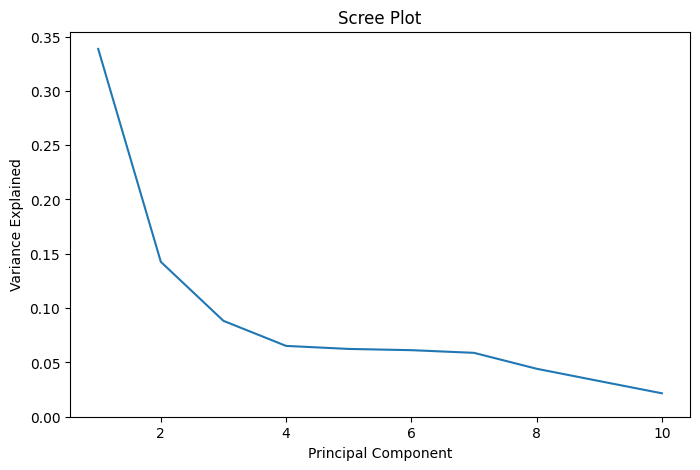

In [77]:
std_figure_size = (8,5)

princ_comps_2 = np.arange(pca_2.n_components_, dtype=int) + 1

fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=princ_comps_2, y=pca_2.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(bottom=0)
plt.show()

In [78]:
X_red_2 = PCA(n_components=4, random_state=fixed_random_state).fit_transform(X)

In [79]:
X_red_2 = pd.DataFrame(X_red_2, columns=["pc1", "pc2", "pc3", "pc4"])

X_red_2.head()

,pc1,pc2,pc3,pc4
0,2.972916,0.041320,0.703683,0.907177
1,-1.811377,-2.216530,-1.082702,0.848926
2,2.798768,0.864211,-0.753294,0.255205
3,-2.701283,1.524656,-0.132057,-0.455102
4,0.729346,1.525534,1.161696,0.015812


In [ ]:
#Identifying the "optimal" number of clusters

inertias_2 = []
range_clusters_2 = np.arange(2, 10, dtype=int)

for n in range_clusters_2:
    kmeans_2 = KMeans(n_clusters=n, random_state=fixed_random_state).fit(X_red_2)
    inertias_2.append(kmeans_2.inertia_)

# inertias_2

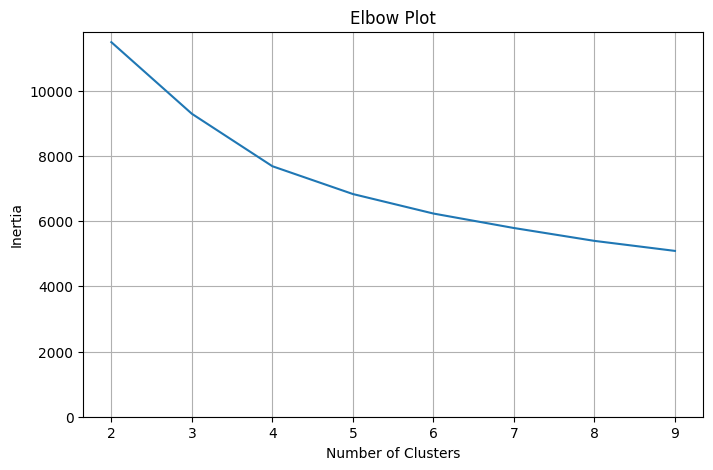

In [81]:
fig, axs = plt.subplots(figsize=std_figure_size)
sns.lineplot(x=range_clusters_2, y=inertias_2)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.ylim(bottom=0)
plt.grid()
plt.show()

In [ ]:
labels_2 = KMeans(n_clusters=4, random_state=fixed_random_state).fit_predict(X_red_2)

In [83]:
!pip install umap-learn
import umap

reducer_2 = umap.UMAP(n_components=2, n_neighbors=15, n_jobs=-1, random_state=fixed_random_state)
embedding_2 = reducer_2.fit_transform(X_red_2)

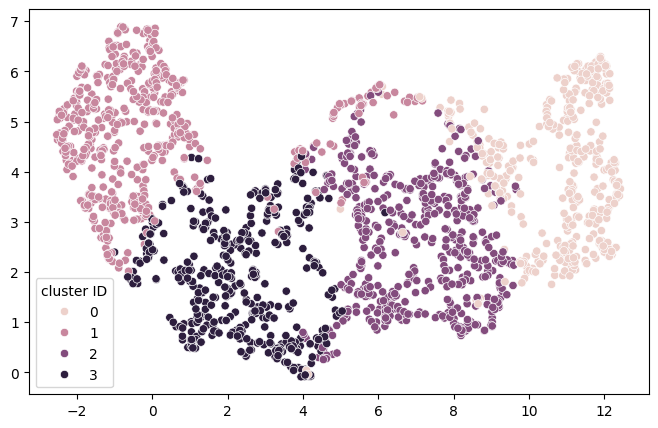

In [84]:
plt.figure(figsize=std_figure_size)
sns.scatterplot(x=embedding_2[:, 0], y=embedding_2[:, 1], hue=labels_2)
plt.legend(title="cluster ID")
plt.show()

# ***Conclusión general***

Los cuatro grupos exhiben características demográficas únicas que son fundamentales para segmentar el mercado y adaptar estrategias de marketing. Ejemplos de estrategias: Para los padres, en su mayoría de mayor edad y con adolescentes en casa, se sugiere que podrían apreciar productos y servicios diseñados para la crianza de adolescentes y las necesidades de las familias maduras. En este grupo, estrategias que enfaticen la conveniencia y la calidad de los productos podrían ser efectivas.

Por otro lado, las parejas sin hijos podrían estar interesadas en productos de alta gama y experiencias exclusivas. Estrategias que resalten la calidad y el estilo de vida aspiracional podrían atraer a este segmento. Los padres con un solo hijo podrían ser receptivos a ofertas que simplifiquen la crianza y el cuidado de niños pequeños, así como a productos innovadores y asequibles para el hogar y la familia.

Por último, para estos grupos, estrategias de marketing que resalten la relación calidad-precio podrían ser particularmente efectivas. Se recomienda llevar a cabo una investigación sobre los medios de comunicación más frecuentados, ya sea televisión, radio o redes sociales, para desarrollar estrategias de mercadeo a través de los medios preferidos por cada grupo demográfico.

**Bibliografía**

https://jorgeiblanco.medium.com/t%C3%A9cnicas-innovadoras-para-el-manejo-de-valores-at%C3%ADpicos-outliters-en-el-an%C3%A1lisis-y-ciencia-de-d5fb5cf8d7ce

https://docs.kanaries.net/es/topics/Pandas/pandas-where

https://cienciadedatos.net/documentos/py20-clustering-con-python